# Centralized version

In [145]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

## Functions

### Auxiliar functions

In [3]:
pass

### Mandatory functions

In [4]:
def serialReadFile(filename):
    return pd.read_csv(filename)

In [26]:
def serialAssign2cluster(x, centroids):
    min_distance = np.Inf
    centroid = 0
    for it, c in enumerate(centroids):
        d = abs((x-c).sum())
        if d <= min_distance:
            min_distance = d
            centroid = it
        
    return centroid

In [110]:
def serialKMeans(X, K, n_iter):
    n = df.columns.size
    
    # We don't use this initialization because then all values end up on the same cluster
    # c = [np.random.rand(n) * 255 for _ in range(K)] # Multiply by 255 to have a value between 0 and 255
    
    # We initialize the clusters using a random point from the dataset
    c = [df.values[np.random.randint(0, len(X))] for _ in range(K)]
    
    for iter in range(n_iter):
        datums_per_c = [[] for _ in range(K)]
        for x_idx, datum in X.iterrows():
            c_idx = serialAssign2cluster(datum, c)
            datums_per_c[c_idx].append(x_idx)
        for i in range(K):
            if len(datums_per_c[i]) > 0:
                c[i] = df.iloc[datums_per_c[i]].mean().to_list()
    
    
    # Assign the values to a cluster to return it on the var 'datums_per_c'
    datums_per_c = [[] for _ in range(K)]
    for x_idx, datum in X.iterrows():
            c_idx = serialAssign2cluster(datum, c)
            datums_per_c[c_idx].append(x_idx)

    return c, datums_per_c

## Testing

In [178]:
df = serialReadFile("../data/tot_mnist_shuf.csv")

In [179]:
labels = df.loc[:, df.columns == 'label']
df = df.loc[:, df.columns != 'label']

In [180]:
c, datums_per_c = serialKMeans(df, 10, 5)

## Plot the centroids with respect to the class

In [181]:
cluster_vs_class = {}
for cluster, indices in enumerate(datums_per_c):
    for index in indices:
        cluster_class = (cluster, labels.iloc[index][0])
        if not cluster_class in cluster_vs_class:
            cluster_vs_class[cluster_class] = 1
        else:
            cluster_vs_class[cluster_class] += 1

In [182]:
heatmap = [[0]*10 for _ in range(10)]
for cluster_class, value in cluster_vs_class.items():
    cluster = cluster_class[0]
    clas = cluster_class[1]
    heatmap[cluster][clas] = value

The plot shows in which cluster (axis y) was each datum of the classes (axis x) assigned.

<Figure size 640x480 with 0 Axes>

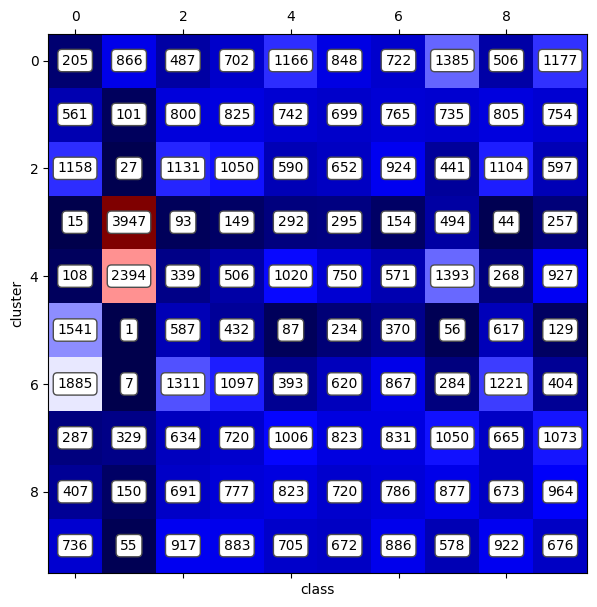

In [184]:
plt.clf()
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
ax.matshow(heatmap, cmap='seismic')
for (i, j), z in np.ndenumerate(heatmap):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
ax.set_xlabel('class')
ax.set_ylabel('cluster')

plt.show()